# How pedestrians activity changed in time

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 20})

In [2]:
from data import read_count

In [3]:
def read_merge(camera_location, feature, bins, xrange, tiled=True):
    df = pd.DataFrame()
    for y in range(2016, 2021):
        t = '-split6' if tiled else ''  
        df_y = read_count(f'data/{camera_location}-{y}{t}.csv')
        df_y = df_y[['date', feature]]
        df = df.append(df_y)
        
    df = df.reset_index() 
    
    m = df.loc[df['person'].idxmax()]
    print('Max. persons', m['person'], '\t', m['date'])
    person_mean = df.person.mean()
    
    #ax = df['person'].hist(bins=bins, range=xrange); 
    ax = df['person'].hist(bins=bins); 
    plt.axvline(x=df.person.mean(), color='red', linestyle='dotted', linewidth=2);
    ax.set_xlabel('Pedestrians on one image')
    ax.set_ylabel('Count')    
    ax.annotate(f'mean = {person_mean:.1f}', xy=(person_mean*1.1, ax.get_ylim()[1]*0.6))
    #plt.savefig(f'figure/{camera_location}-count-{feature}.png')
    
    return df

Max. persons 80 	 2019-11-17 15:00:00


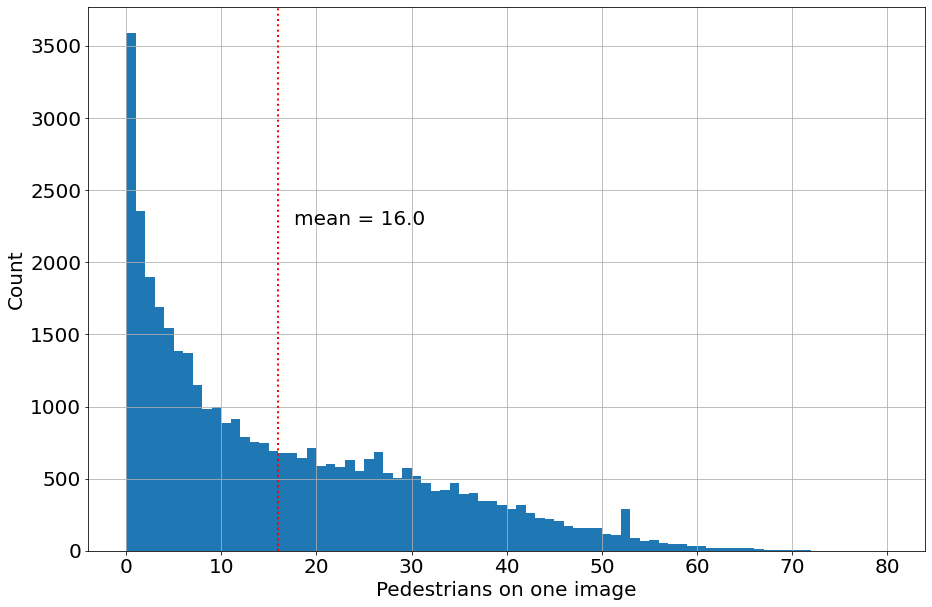

In [4]:
df_allsaints = read_merge('all_saints_square', 'person', bins=80, xrange=[0, 100])

In [5]:
df_grodzka = read_merge('grodzka', 'person', bins=60, xrange=[-5, 30])

Max. persons 58 	 2019-05-04 14:00:00


Max. persons 16 	 2019-03-24 16:00:00


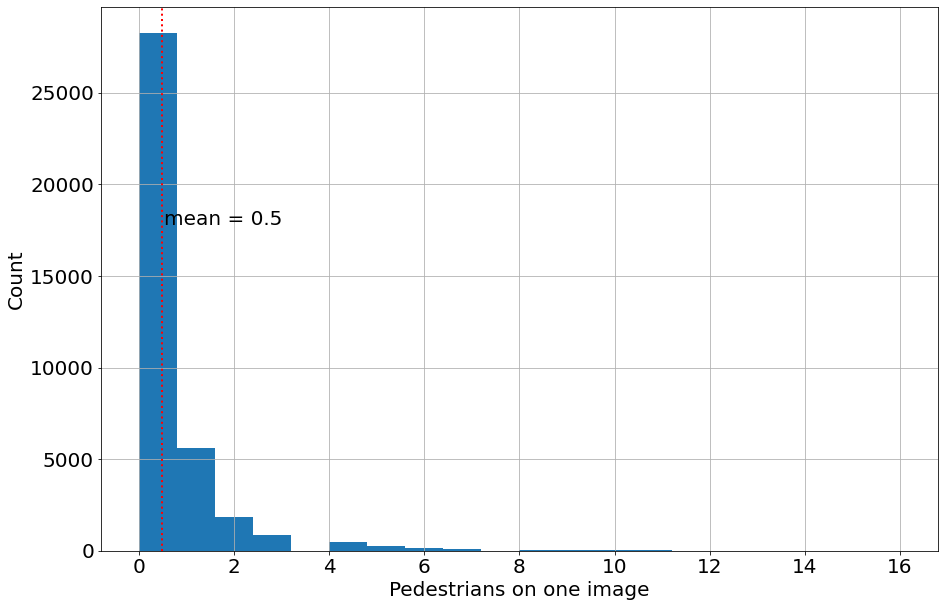

In [6]:
df_wawel = read_merge('wawel', 'person', bins=20, xrange=[-5, 9])

Max. persons 37 	 2020-09-06 19:00:00


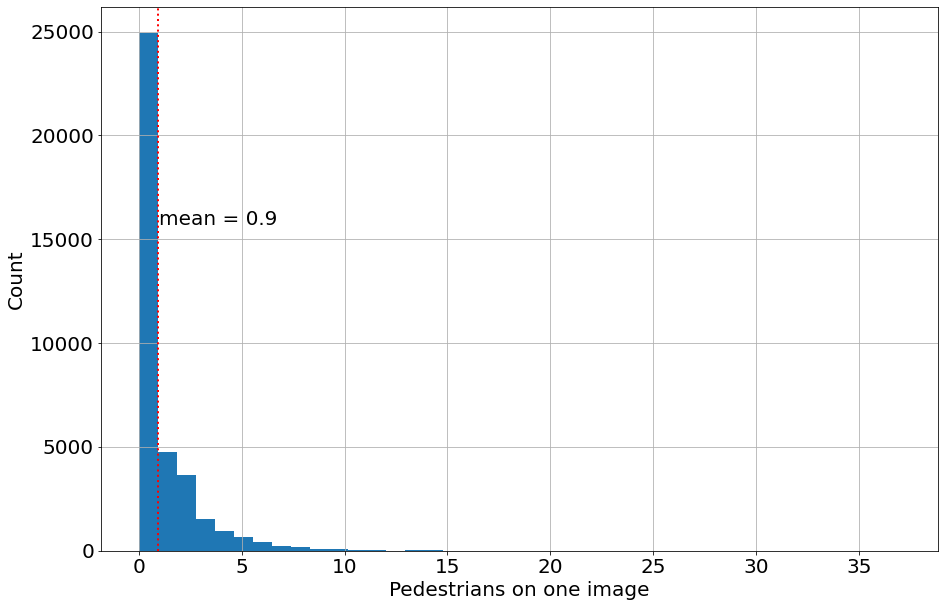

In [7]:
df_podgorze = read_merge('podgorze_market_square', 'person', bins=40, xrange=[-5,9])

## Daily mean

In [11]:
def plot_day(df):
    df_out = df.resample('D', on='date')['person'].mean().reset_index()
    plt.plot(df_out.date, df_out.person)
    plt.xlabel('Time')
    plt.ylabel('Mean daily pedestrians from 1h time-lapse')
    
    return df_out

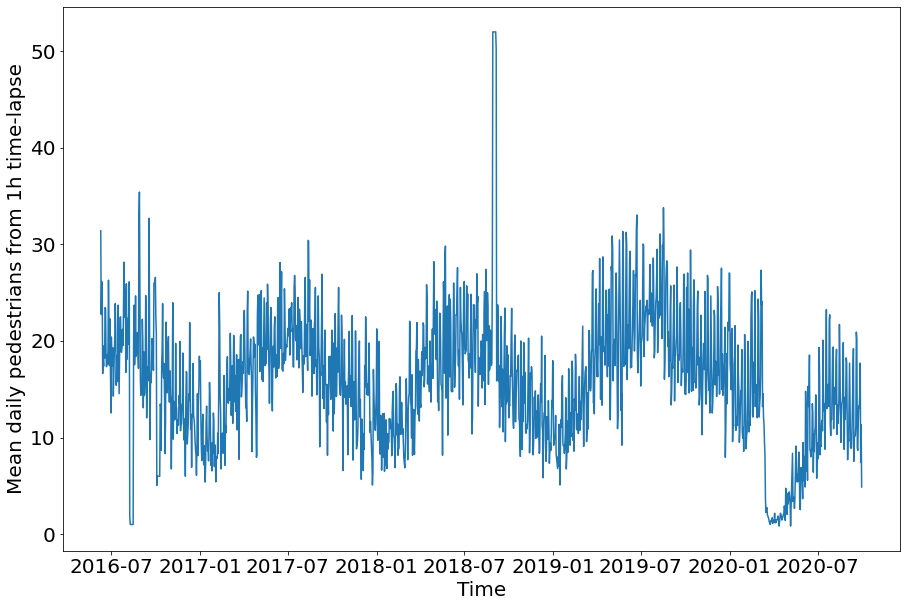

In [12]:
plot_day(df_allsaints);

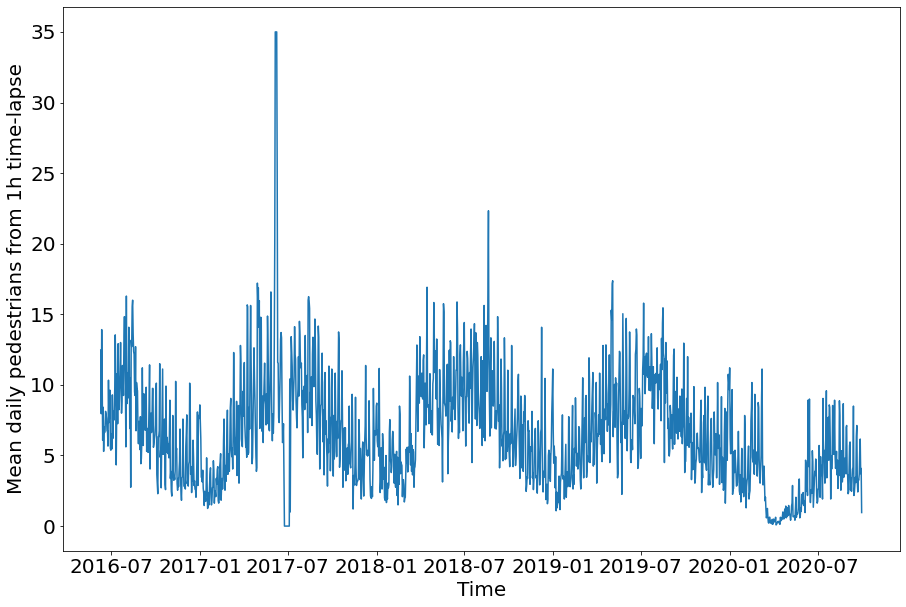

In [13]:
plot_day(df_grodzka);

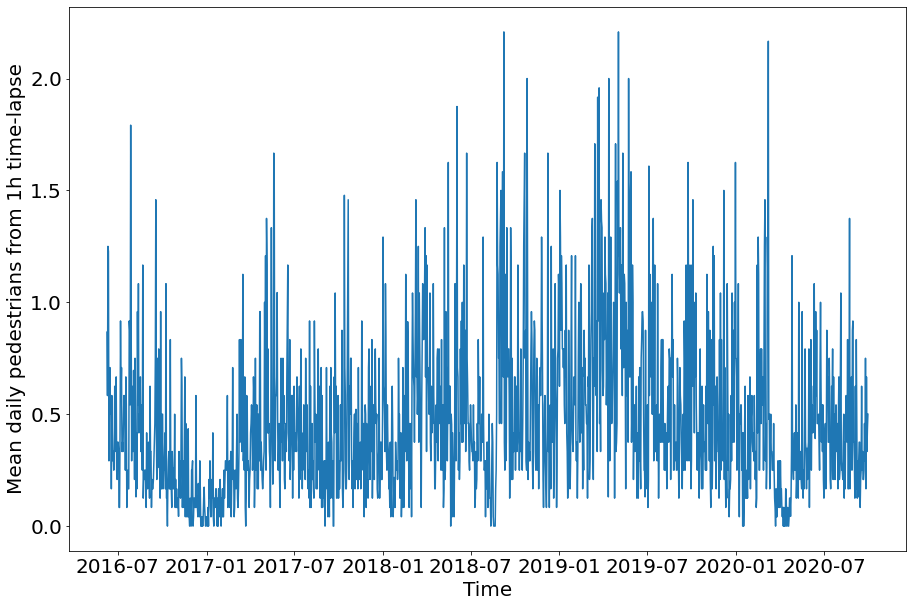

In [14]:
plot_day(df_wawel);

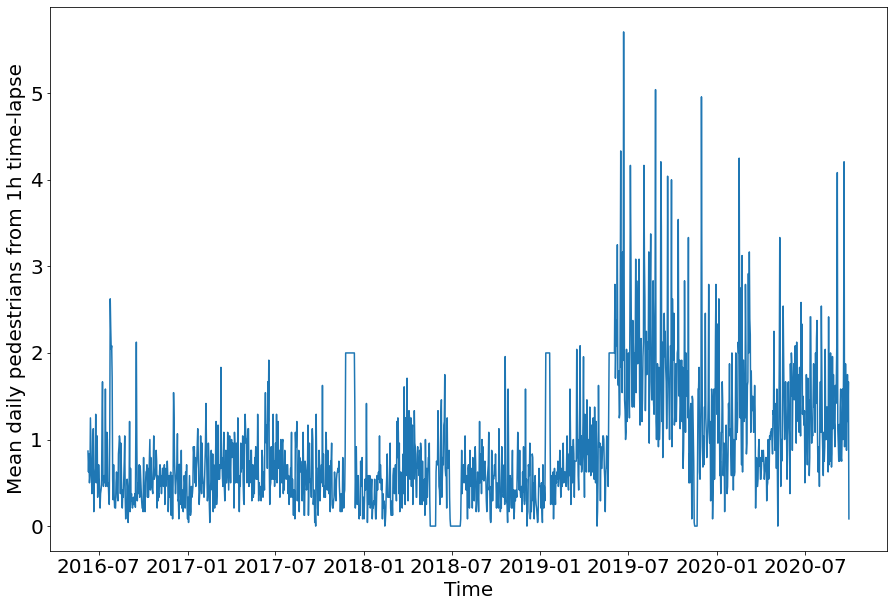

In [15]:
plot_day(df_podgorze);

## Daily sum

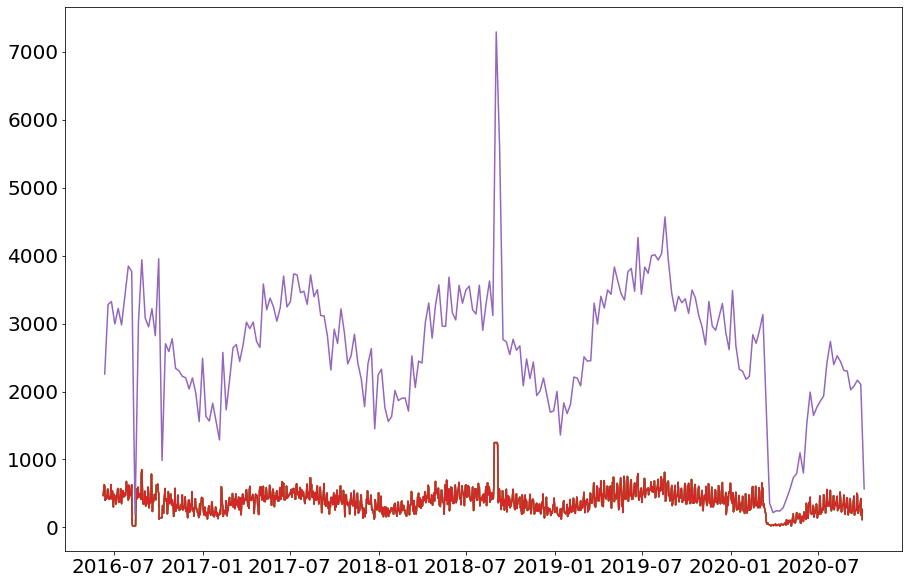

In [16]:
df1d = df_allsaints.resample('D', on='date')['person'].sum().reset_index()
plt.plot(df1d.date, df1d.person)
df1d = df_allsaints.resample('D', on='date')['person'].sum().reset_index()
plt.plot(df1d.date, df1d.person)
df1d = df_allsaints.resample('D', on='date')['person'].sum().reset_index()
plt.plot(df1d.date, df1d.person)
df1d = df_allsaints.resample('D', on='date')['person'].sum().reset_index()
plt.plot(df1d.date, df1d.person)
df2w = df_allsaints.resample('W', on='date')['person'].sum().reset_index()
plt.plot(df2w.date, df2w.person)

## Key dates - restrictions in Poland

In [17]:
rest1 = '2020-03-13'
rest2 = '2020-03-24'
rest3 = '2020-03-31'

## Resampled data

In [18]:
def plot_period(period='W'):    
    df_1 = df_allsaints.resample(period, on='date')['person'].mean().reset_index()
    df_2 = df_grodzka.resample(period, on='date')['person'].mean().reset_index()
    df_3 = df_wawel.resample(period, on='date')['person'].mean().reset_index()
    df_4 = df_podgorze.resample(period, on='date')['person'].mean().reset_index()
    plt.plot(df_1.date, df_1.person)
    plt.plot(df_2.date, df_2.person)
    plt.plot(df_3.date, df_3.person)
    plt.plot(df_4.date, df_4.person)
    
    plt.axvline(x=pd.to_datetime(rest1), color='red', linestyle='dotted', linewidth=2);
    plt.axvline(x=pd.to_datetime(rest2), color='red', linestyle='dotted', linewidth=2);
    plt.axvline(x=pd.to_datetime(rest3), color='red', linestyle='dotted', linewidth=2);
    
    return df_1

### Monthly mean

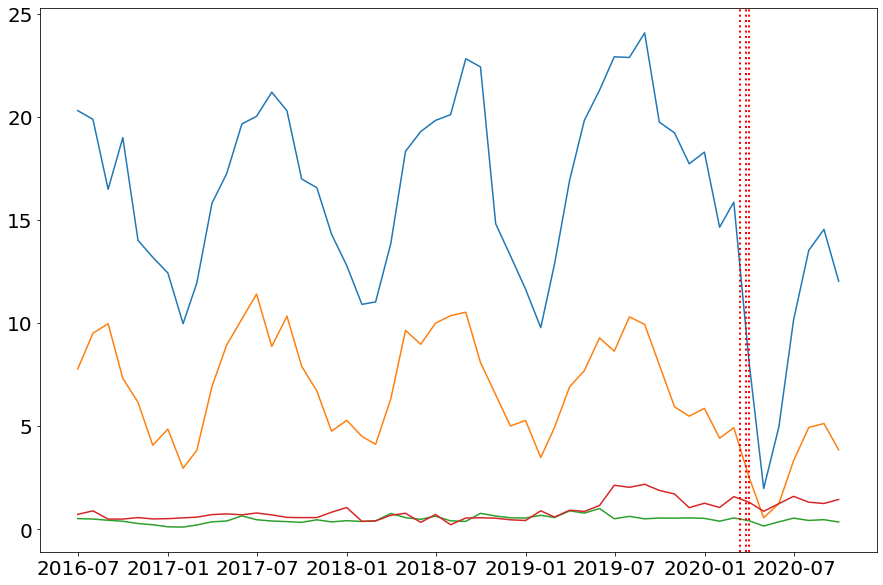

In [19]:
plot_period('M');

### Weekly mean

In [20]:
plot_period('W');

### Daily mean

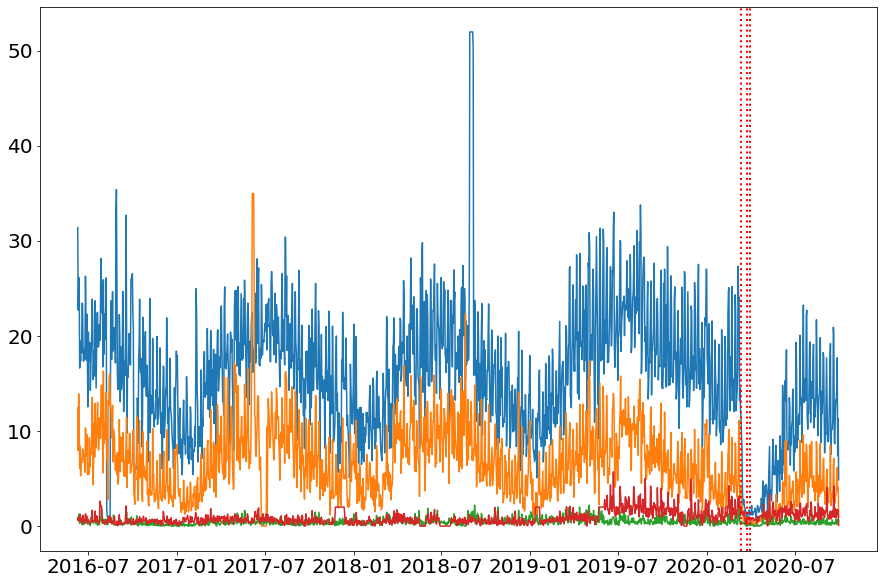

In [21]:
plot_period('D');

# Pedestrian activity in time

In [58]:
def plot_key_dates(y=10):    
    x = pd.to_datetime(rest1)
    plt.text(x, y, 'First restrictions', rotation=-90)
    plt.axvline(x=x, color='red', linestyle='dashed', linewidth=1);

In [59]:
steps = {'D': 'daily',
        'W': 'weekly',
        'M': 'monthly'}

In [94]:
def activity_in_time(step='D', steps_back=6000, save=False):
    fig, ax = plt.subplots()
    t = df_allsaints.iloc[-steps_back:].resample(step, on='date')['person'].mean().reset_index()
    plt.plot(t.date, t.person, label='All Saints Square');
    t = df_grodzka.iloc[-steps_back:].resample(step, on='date')['person'].mean().reset_index()
    plt.plot(t.date, t.person, label='Grodzka');
    t = df_podgorze.iloc[-steps_back:].resample(step, on='date')['person'].mean().reset_index()
    plt.plot(t.date, t.person, label='Podgorze Market Square', color='silver');
    t = df_wawel.iloc[-steps_back:].resample(step, on='date')['person'].mean().reset_index()
    plt.plot(t.date, t.person, label='Wawel Castle');
    plot_key_dates()
    
    plt.xlabel('Time')
    step_txt = steps[step]
    last_day = df_allsaints['date'].tail(1).dt.strftime("%Y-%m-%d").values[0]
    plt.ylabel(f'Mean {step_txt} pedestrians from 1h time-lapse')
    ax.legend()
    if save:
        plt.savefig(f'figure/pedestrian_activity_change_{step_txt}_{last_day}.png');

In [93]:
last_day = df_allsaints['date'].tail(1).dt.strftime("%Y-%m-%d").values[0]
print('x', last_day)

x 2020-09-30


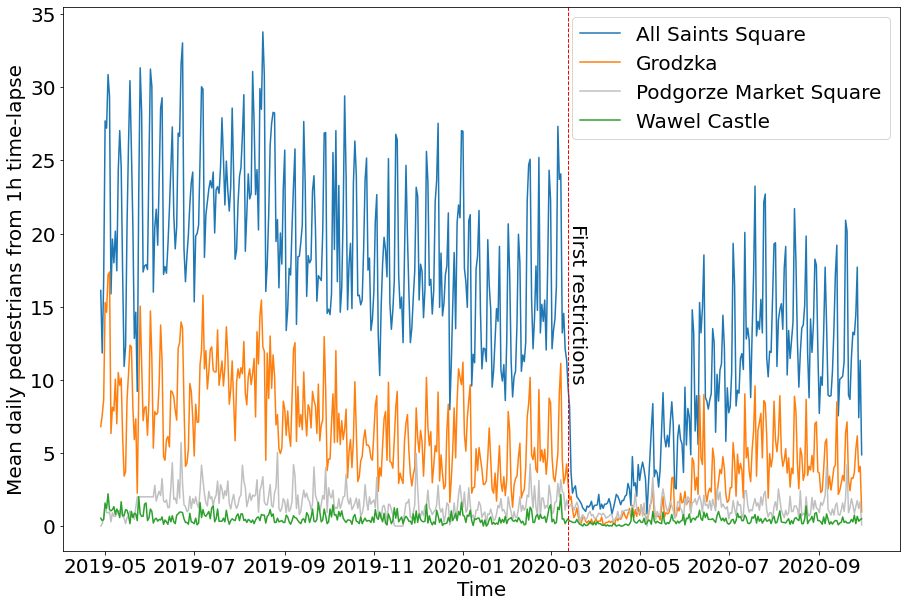

In [96]:
activity_in_time('D',12500)

In [97]:
activity_in_time('W',12500, True)

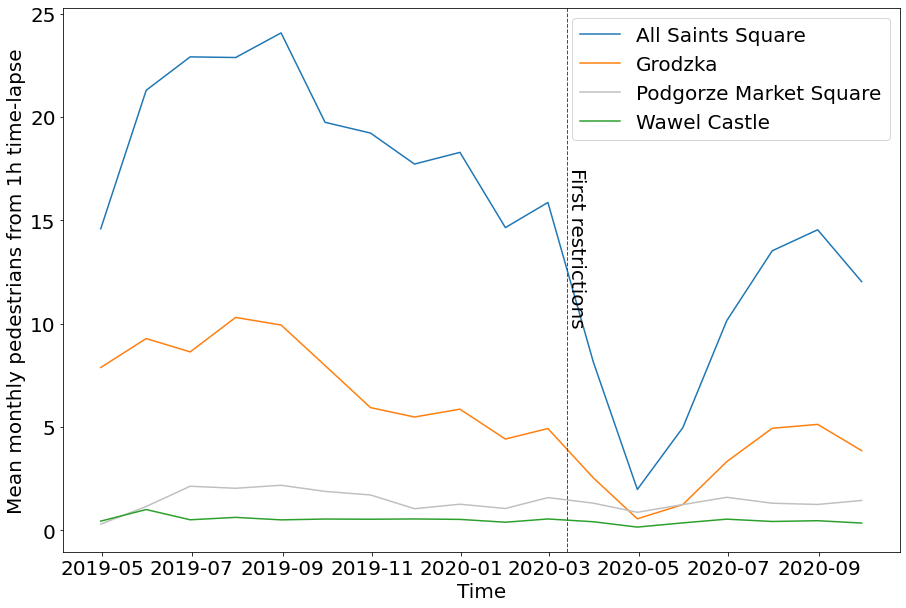

In [99]:
activity_in_time('M',12500)